# First Ever ODMR Curve

This is a script that will only be used to generate the first ever ODMR dip that we observed in our system. 

In [35]:
import numpy as np 
import matplotlib.pyplot as plot 
import os
import pandas as pd
import scipy.optimize as opt

In [13]:
def import_data(file_location):
    '''Import data into a numpy variable.'''
    
    data = np.loadtxt(file_location, delimiter = '\t')
    
    useful_data = data[1:]
    return(useful_data)

In [36]:
def linear(x, m, c):
    '''linear fitting'''
    
    y = m*x + c
    return(y)

In [89]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [90]:
folder_loc = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\ODMR\\Microwave Delivery Testing\\20181121\\'
file_name = '20181121_05.csv'
set_plot_params()
data = import_data(folder_loc + file_name)

p= [0,0]

linear_param, confidence = opt.curve_fit(linear, data[:,0], data[:,1], p)
y = linear(data[:,0], linear_param[0], linear_param[1])

Text(0, 0.5, 'Fluorescence Intensity (per 10ms)')

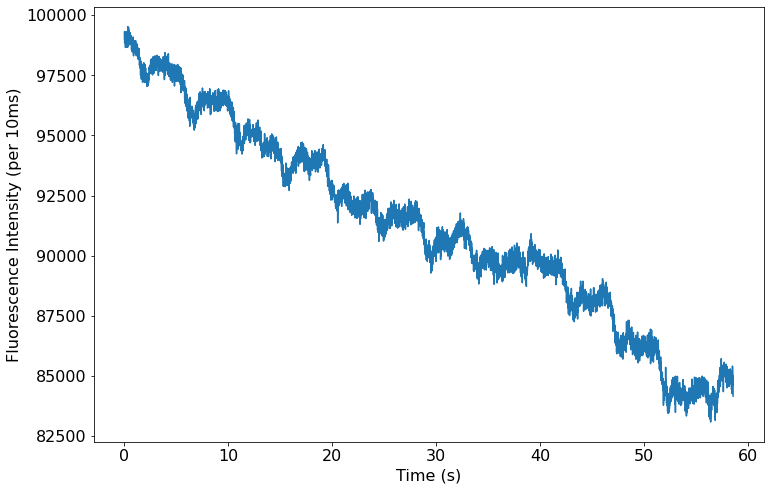

In [99]:
#plot.plot(data[:,0], data[:,1])
#plot.axis([0,10000, 90000, 100000])
#plot.plot(data[:,0], y)
fig, ax = plot.subplots()
drift_adjust = data[:,1] + (y[0] - y)
plot.plot(data[:,0]/1000, data[:,1])
plot.xlabel('Time (s)')
plot.ylabel('Fluorescence Intensity (per 10ms)')

In [92]:
print(data.shape[0]/100)

58.57


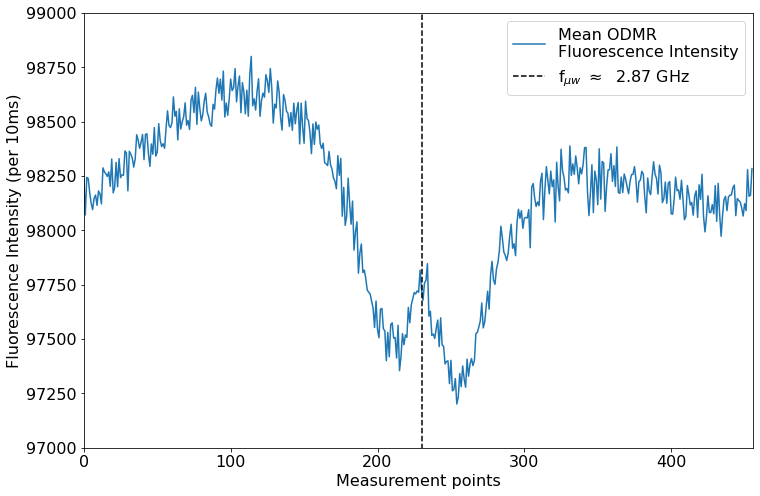

In [137]:
#plot.plot(data[150:250,0], data[150:250,1])
#plot.plot(data[220:650,0], drift_adjust[220:650])
useful_data = []
test = []
for i in range(int(len(drift_adjust[190:5665])/456)):
    useful_data.append(drift_adjust[190+i*456:190+(i+1)*456])
    test.append(data[190+i*456:190+(i+1)*456,1])
#trimmed_data = useful_data[435:3603]
#plot.plot(data[435:3603, 0], useful_data)

y1 = np.roll(np.mean(useful_data, axis = 0), 228)
y2 = np.roll(np.mean(test, axis = 0), 228)

fig1, ax1 = plot.subplots()
plot.plot(np.linspace(0, 455, 456), y1, label = 'Mean ODMR \nFluorescence Intensity')
#plot.plot(np.linspace(0, 455, 456), y2)
plot.xlabel('Measurement points')
plot.ylabel('Fluorescence Intensity (per 10ms)')
plot.axis([0, 456, 97000, 99000])
x = [230, 230]
y3 = [95000, 100000] 

plot.plot(x, y3, linestyle = '--', color = 'k', label = r'f$_{\mu w}~\approx$  2.87 GHz')
#plot.text(235, 98750, r'f$_{\mu w}~\approx$  2.87 GHz')
plot.legend()
#fig1.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\First ODMR curve plots\\'+
#            'first_mean_odmr.pdf')

In [140]:
100*(1-(97500/98700))

1.2158054711246202

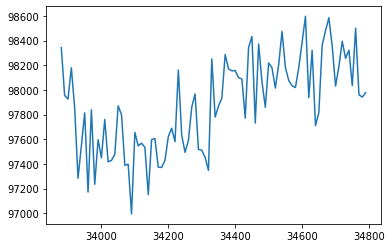

In [55]:
plot.plot(data[3388:3480,0], drift_adjust[3388:3480])

In [94]:
print(data.shape[0]/456)

12.844298245614034


In [75]:
54753/12

4562.75

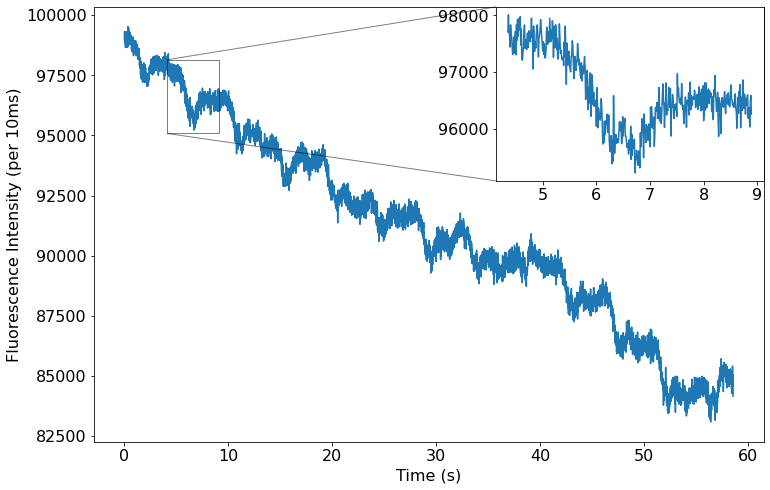

In [116]:
fig, ax = plot.subplots()
ax.plot(data[:,0]/1000, data[:,1])
plot.xlabel('Time (s)')
plot.ylabel('Fluorescence Intensity (per 10ms)')

# inset axes....
axins = ax.inset_axes([0.6, 0.6, 0.4, 0.4])
axins.plot(data[435:890,0]/1000,data[435:890,1])#Z2, extent=extent, origin="lower")
# sub region of the original image
#x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticklabels([])
#axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")
#fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\First ODMR curve plots\\'
#           + 'First_ODMR_full_measurement.pdf')